# Прогнозирование спроса на аренду велосипедов

Загрузим и визуализируем данные, посмотрим на статистики:

In [12]:
import mlflow
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


df = pd.read_csv("train.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


Выделим тренды, сезонность, аномалии/выбросы в данных

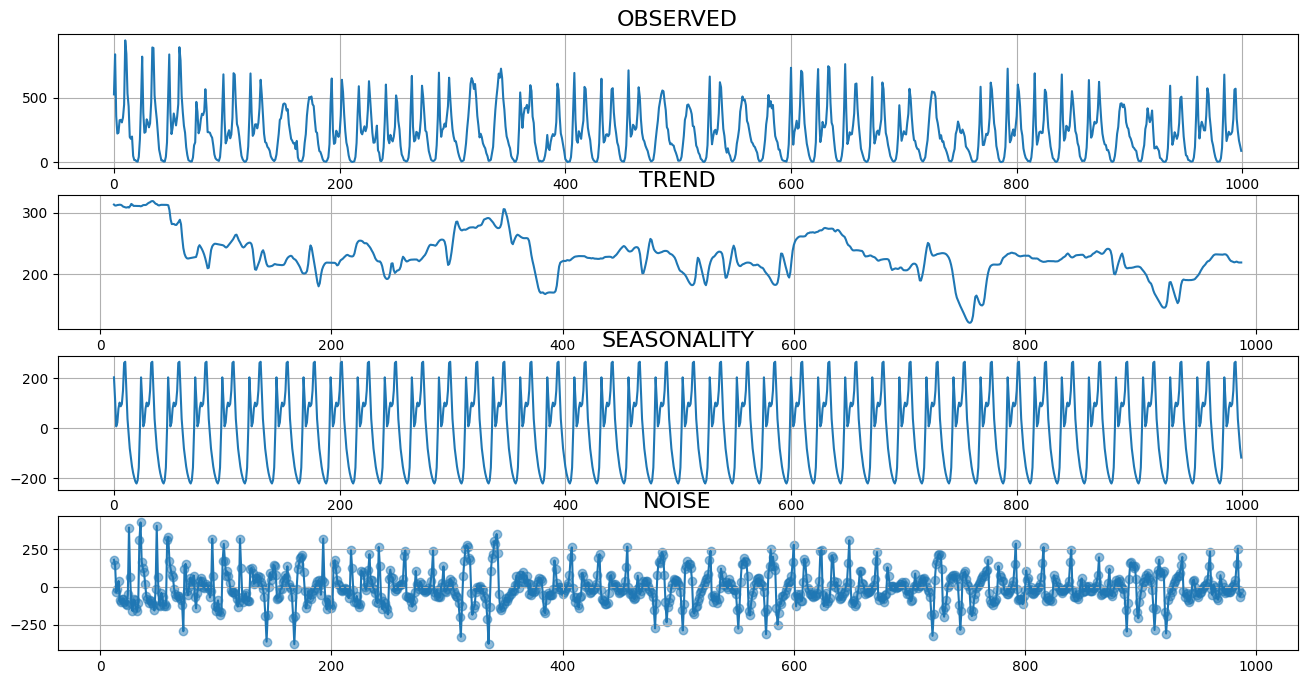

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose


def decompose_bike_sharing_demand(df, share_type='count', samples=250, period=24):
    if samples == 'all':
        #decomposing all time series timestamps
        res = seasonal_decompose(df[share_type].values, period=period)
    else:
        #decomposing a sample of the time series
        res = seasonal_decompose(df[share_type].values[-samples:], period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.show()

decompose_bike_sharing_demand(df, samples=1000, period=24)

Рассмотрим корреляцию на спрос в разрезе предыдущих суток

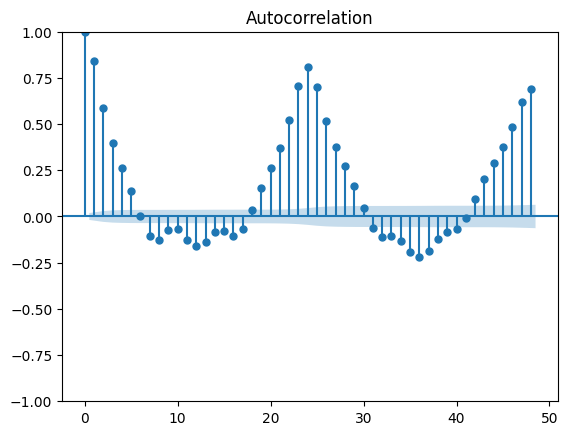

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['count'].values, lags=48)
plt.show()

Переведём datetime в более точные атрибуты - по часам, дням, месяцам

In [17]:
#convert datetime from object to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])
#set datetime as index
df = df.set_index(df.datetime)

#drop datetime column
df.drop('datetime', axis=1, inplace=True)

#create hour, day and month variables from datetime index
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month

#drop casual and registered columns
df.drop(['casual', 'registered'], axis=1, inplace=True)

df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,0,1,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2,1,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,3,1,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19,19,12
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,20,19,12
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,21,19,12


Обучим простую модель градиентного бустинга (GBM) для предсказаний с окном прогнозирования за последние сутки

In [18]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import seaborn as sns


def train_time_series_with_folds(model, df, horizon=24*7):
    with mlflow.start_run():
        X = df.drop('count', axis=1)
        y = df['count']
        
        #take last week of the dataset for validation
        X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
        y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]
        
        #create, train and do inference of the model
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        signature = mlflow.models.infer_signature(X_train, predictions)
        
        #calculate MAE
        mae = np.round(mean_absolute_error(y_test, predictions), 3)
        mlflow.log_metric("mae", mae)

        mlflow.sklearn.log_model(
            model,
            "model",
            registered_model_name="GBMBicycleDemandPredictor",
            signature=signature
        )

        #plot reality vs prediction for the last week of the dataset
        fig = plt.figure(figsize=(16,8))
        plt.title(f'Real vs Prediction - MAE {mae}', fontsize=20)
        plt.plot(y_test, color='red')
        plt.plot(pd.Series(predictions, index=y_test.index), color='green')
        plt.xlabel('Hour', fontsize=16)
        plt.ylabel('Number of Shared Bikes', fontsize=16)
        plt.legend(labels=['Real', 'Prediction'], fontsize=16)
        plt.grid()
        plt.show()
        
        #create a dataframe with the variable importances of the model
        df_importances = pd.DataFrame({
            'feature': model.feature_name_,
            'importance': model.feature_importances_
        }).sort_values(by='importance', ascending=False)
        
        #plot variable importances of the model
        plt.title('Variable Importances', fontsize=16)
        sns.barplot(x=df_importances.importance, y=df_importances.feature, orient='h')
        plt.show()

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 10718, number of used features: 11
[LightGBM] [Info] Start training from score 191.275518


/home/dion/.local/lib/python3.11/site-packages/mlflow/models/signature.py:214: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)
/home/dion/.local/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. T

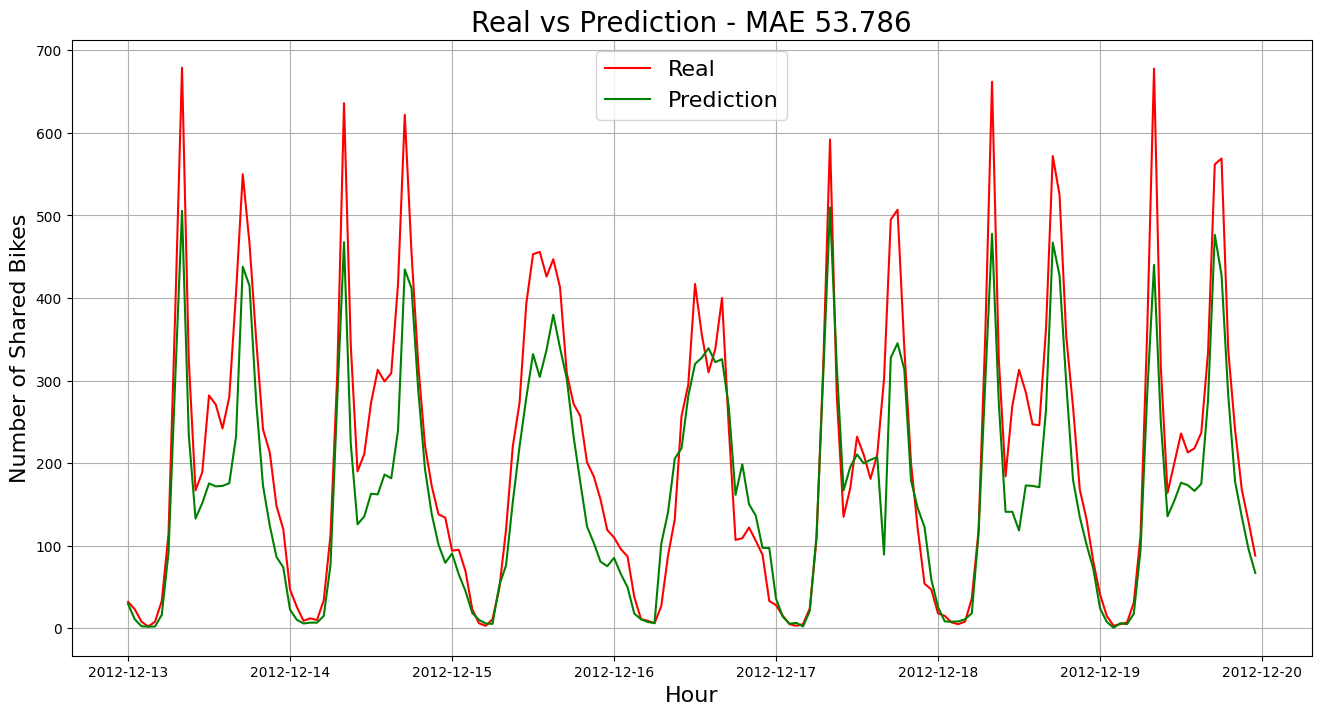

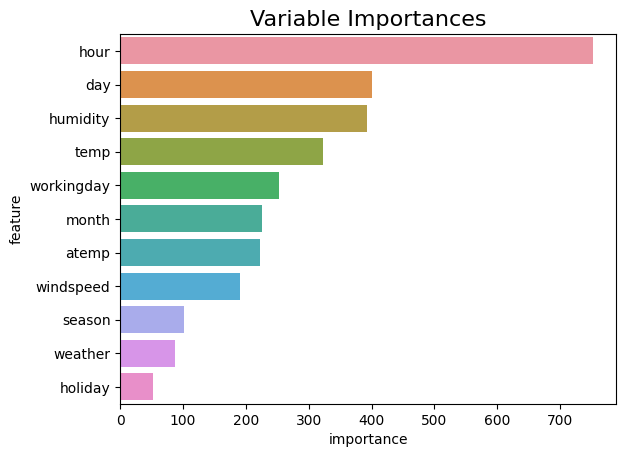

In [19]:
model = LGBMRegressor(random_state=42)

train_time_series_with_folds(model, df)

Попробуем обучить модель с окном в 1 неделю

In [20]:
#create 1 week lag variable by shifting the target value for 1 week
df['count_prev_week_same_hour'] = df['count'].shift(24*7)

#drop NaNs after feature engineering
df.dropna(how='any', axis=0, inplace=True)

df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,count_prev_week_same_hour
datetime,,,,,,,,,,,,,
2011-01-08 07:00:00,1,0,0,2,6.56,9.090,74,7.0015,9,7,8,1,16.0
2011-01-08 08:00:00,1,0,0,3,6.56,9.090,93,7.0015,15,8,8,1,40.0
2011-01-08 09:00:00,1,0,0,3,6.56,9.090,93,7.0015,20,9,8,1,32.0
2011-01-08 10:00:00,1,0,0,2,7.38,9.850,80,11.0014,61,10,8,1,13.0
2011-01-08 11:00:00,1,0,0,2,8.20,9.090,69,26.0027,62,11,8,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19,19,12,402.0
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,20,19,12,268.0
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,21,19,12,202.0


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 544
[LightGBM] [Info] Number of data points in the train set: 10550, number of used features: 12
[LightGBM] [Info] Start training from score 193.422370


/home/dion/.local/lib/python3.11/site-packages/mlflow/models/signature.py:214: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  inputs = _infer_schema(model_input)
/home/dion/.local/lib/python3.11/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. T

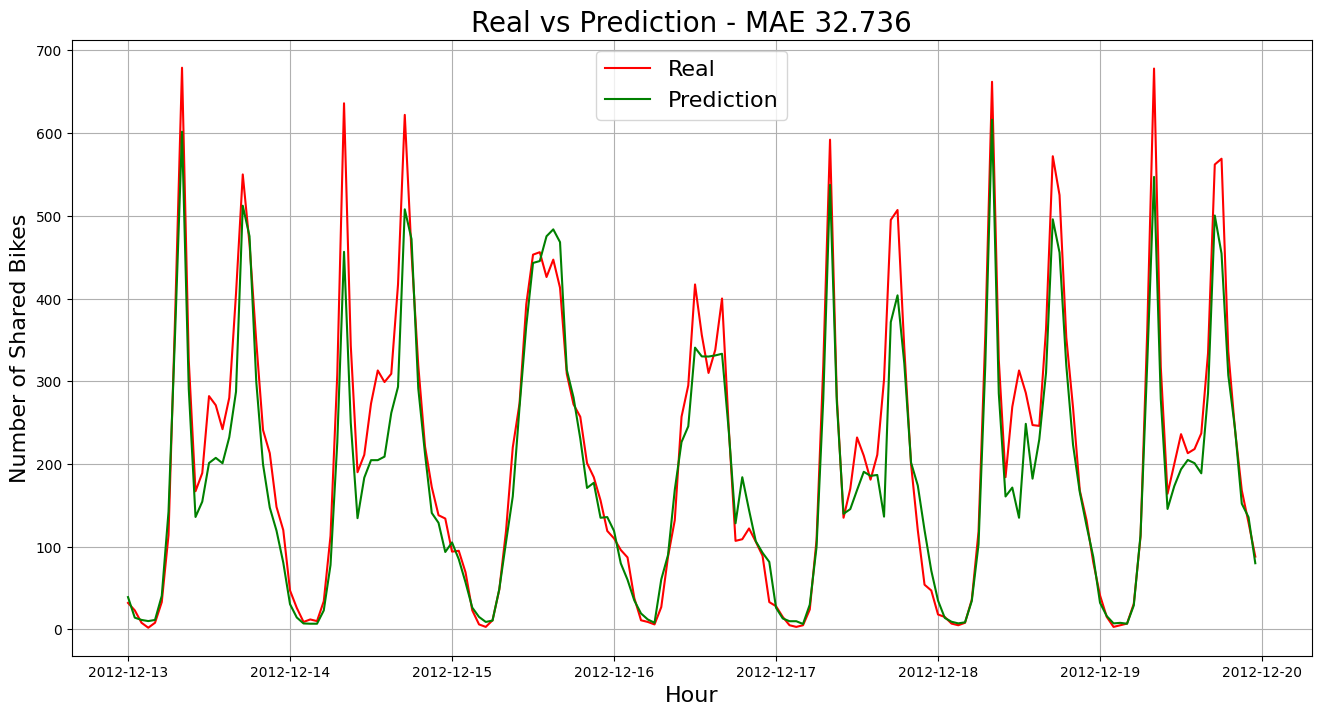

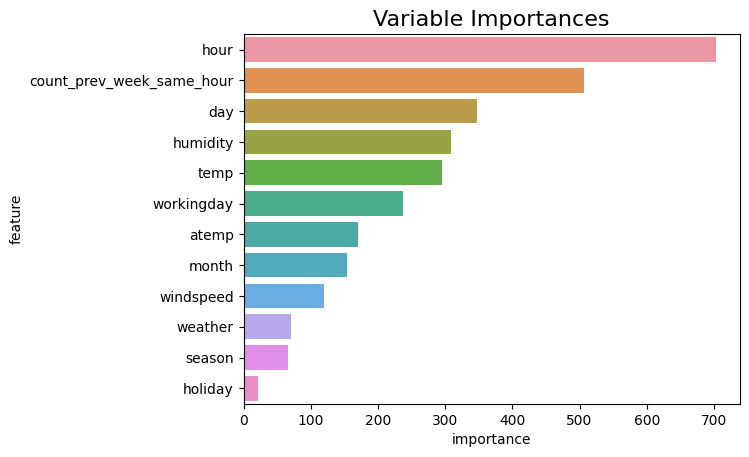

In [21]:
model = LGBMRegressor(random_state=42)

train_time_series_with_folds(model, df)

In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv("test.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index(df.datetime)
df.drop('datetime', axis=1, inplace=True)
df['hour'] = np.int64(df.index.hour)
df['day'] = np.int64(df.index.day)
df['month'] = np.int64(df.index.month)

df.dtypes

NameError: name 'np' is not defined